In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model


In [24]:
df=pd.read_csv('hiring.csv')

In [25]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [26]:
df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

#### Here dependent variable is salary(y) depending on more than one independent variables experience(x1),test_score(x2),interview_score(x3) so our equation becomes manually like y=m1x1 + m2x2 +m3x3 + b

#### we have to do first 
* data preprocessing- handling NA values then apply multiple variables

In [27]:
df.rename(columns={"test_score(out of 10)":'Testscore','interview_score(out of 10)':'interviewscore','salary($)':'salary'},inplace=True)

In [28]:
df.experience.fillna("zero",inplace=True)

In [29]:
df

,experience,Testscore,interviewscore,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [30]:
med_testscore=df.Testscore.median()
med_testscore

8.0

In [31]:
df.Testscore=df.Testscore.fillna(med_testscore)

In [32]:
df

,experience,Testscore,interviewscore,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [33]:
df.isna().sum()

experience        0
Testscore         0
interviewscore    0
salary            0
dtype: int64

In [34]:
df.dtypes

experience         object
Testscore         float64
interviewscore      int64
salary              int64
dtype: object

#### Here experience is in words so it is important to convert to numericals

In [35]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [36]:
from word2number import w2n

In [37]:
df.experience=df.experience.apply(w2n.word_to_num)

In [38]:
df

,experience,Testscore,interviewscore,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


#### Now, Data looks cleaned
* After cleaning,frame the model so first check with scatterplot for multiple variables which is pair plot to know whether we can apply linear 

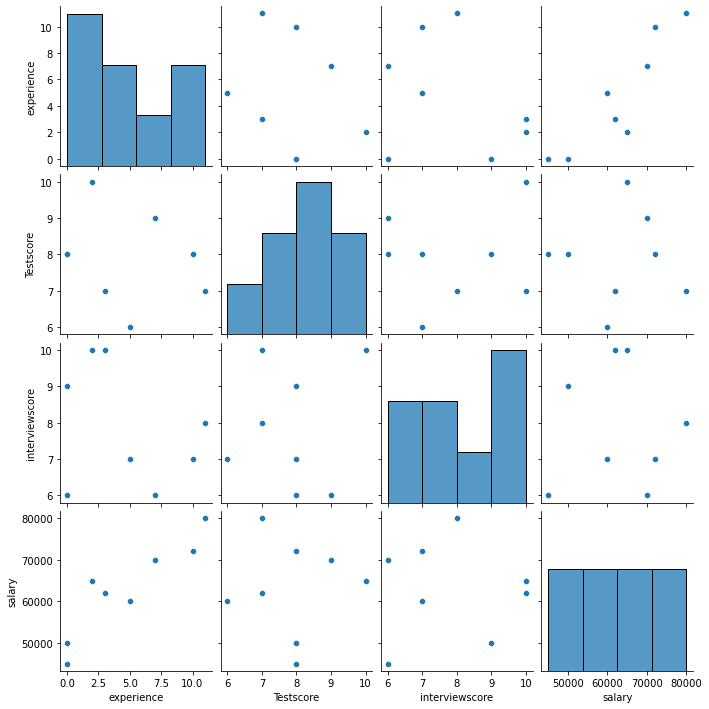

In [39]:
sns.pairplot(data=df)

#### It is either going with decreasing or increasing linear format so linear mutiple regression model can be applied

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   experience      8 non-null      int64  
 1   Testscore       8 non-null      float64
 2   interviewscore  8 non-null      int64  
 3   salary          8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 384.0 bytes


In [41]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','Testscore','interviewscore']],df.salary)

LinearRegression()

#### Next step is to predict for a random set of independent variables

In [42]:
reg.predict([[3,5,7]])

array([50841.33915575])

#### To check whether the value obtained is correct , manual check can be done using the formula
*  y=m1x1 + m2x2 +m3x3 + b 
where m1,m2,m3 are coeficients or slope of independent variables
        b is the intercept 
* for that reg.coef_ and reg.intercept_ can be used

In [43]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [44]:
reg.intercept_

17737.263464337688

#### Hence we get 
** m1=2812.95487627
** m2=1845.70596798
** m3=2205.24017467
** b=17737.263464337688
Also our independent varibles for the prediction are 
* 3 years of experience with test score 5 and interview score 7

In [45]:
 2812.95487627* 3 + 1845.70596798 *5 +2205.24017467*7 +17737.263464337688

50841.33915573769

#### so we get the same manually 

#### Now for predicting more than one salary depending upon the requirement 

* Create a CSV file for prediction required data

In [46]:
d=pd.read_csv('predicting hiring salary.csv')

In [47]:
d

,experience,Testscore,interviewscore
0,0,6,7
1,3,5,10
2,2,9,6
3,12,10,10


In [48]:
d['salary']=reg.predict(d)

In [49]:
d.to_csv('predicting hiring salary.csv',index=False)

In [50]:
d=pd.read_csv('predicting hiring salary.csv')

In [51]:
d

,experience,Testscore,interviewscore,salary
0,0,6,7,44248.180495
1,3,5,10,57457.059680
2,2,9,6,53205.967977
3,12,10,10,92002.183406


### Therefore, through this model we predicted the required salary according to the conditions of independent variable